In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('walmart.csv')
df.head()

Saving walmart.csv to walmart (1).csv


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [3]:
df.dropna(inplace=True)
df['User_ID'] = df['User_ID'].astype('int')
df['Product_ID'] = df['Product_ID'].astype('str')
df['Gender'] = df['Gender'].astype('str')
df['Age'] = df['Age'].astype('str')
df['Occupation'] = df['Occupation'].astype('int')
df['City_Category'] = df['City_Category'].astype('str')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('str')
df['Marital_Status'] = df['Marital_Status'].astype('int')
df['Product_Category'] = df['Product_Category'].astype('int')
df['Purchase'] = df['Purchase'].astype('float')

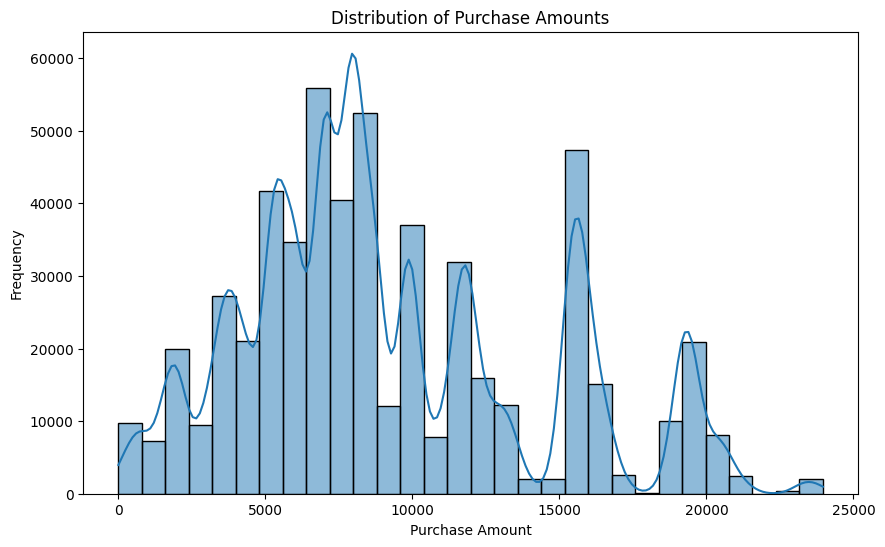

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

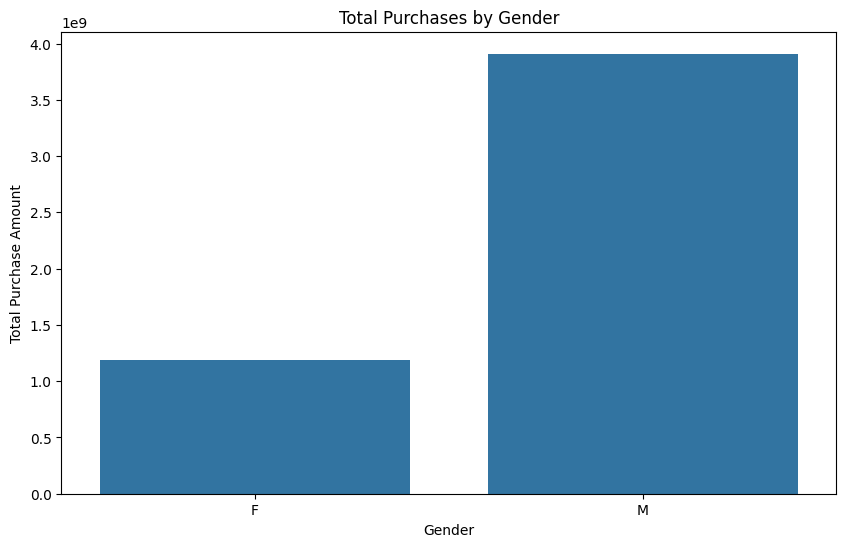

In [5]:
gender_purchases = df.groupby('Gender')['Purchase'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_purchases.index, y=gender_purchases.values)
plt.title('Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.show()

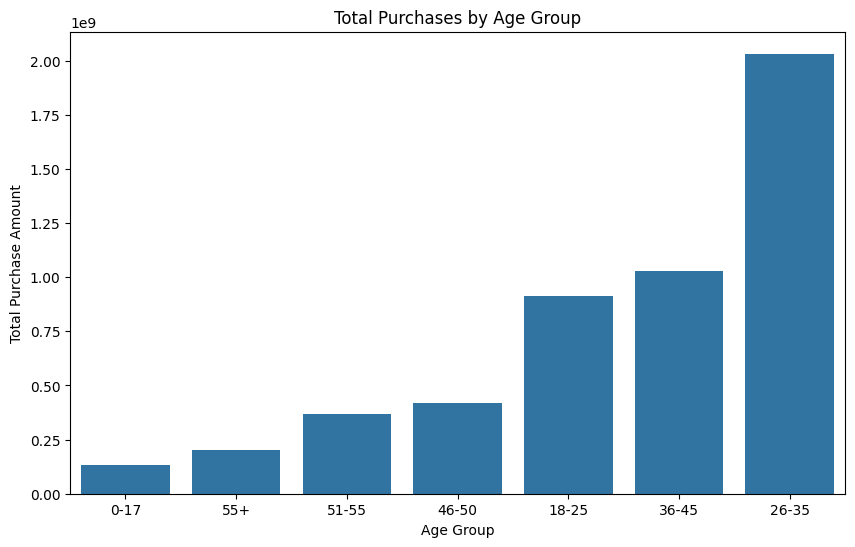

In [6]:
age_purchases = df.groupby('Age')['Purchase'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_purchases.index, y=age_purchases.values)
plt.title('Total Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.show()

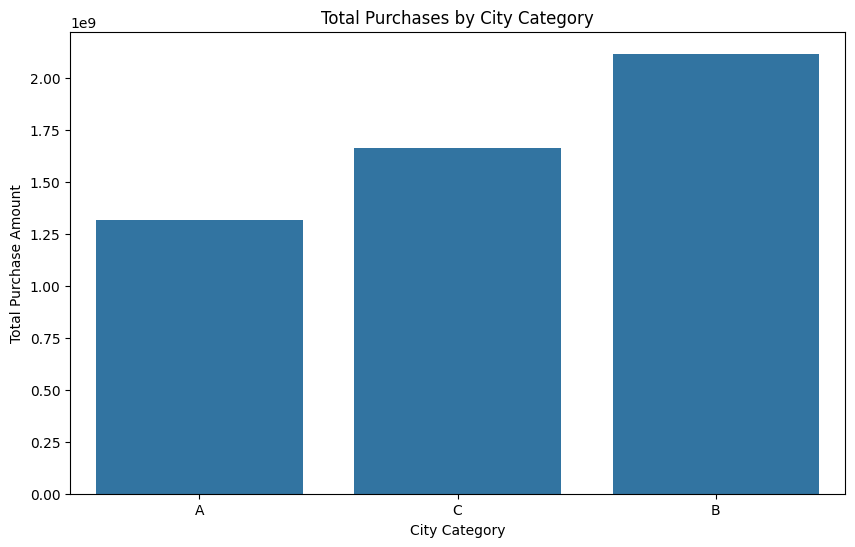

In [7]:
city_purchases = df.groupby('City_Category')['Purchase'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_purchases.index, y=city_purchases.values)
plt.title('Total Purchases by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchase Amount')
plt.show()

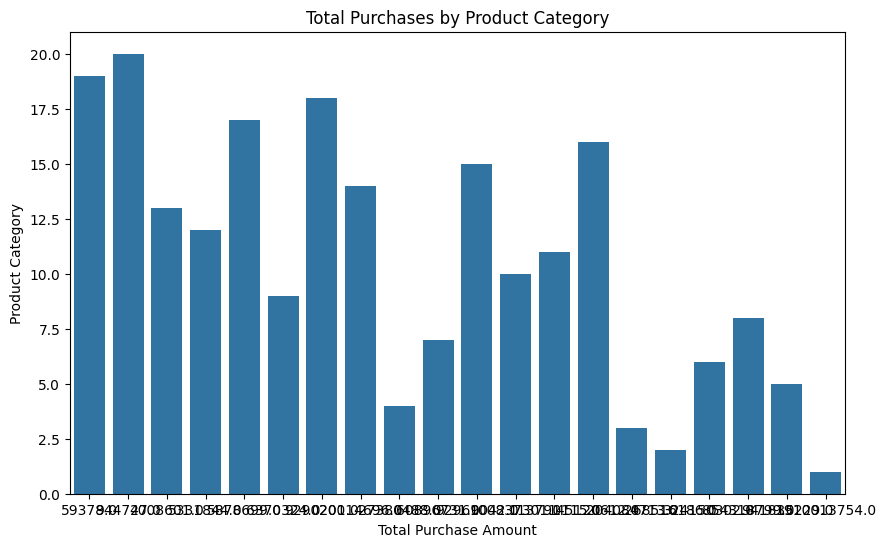

In [8]:
product_purchases = df.groupby('Product_Category')['Purchase'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_purchases.values, y=product_purchases.index)
plt.title('Total Purchases by Product Category')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Product Category')
plt.show()

In [9]:
df.to_csv('cleaned_walmart_data.csv', index=False)